<FONT size="5.9pt"> **(1) SPIRALGORITHM: BIOREFINERY AND AD-CHP-Nrec MODEL**
</FONT> 

This Jupyter notebook shows how the **anaerobic digestion, combined heat and power plant, and nitrogen recovery (AD-CHP-Nrec) model** was constructed.

This notebook also includes a comparison of the LCA results obtained for the production of electricity, heat, and organic nitrogen from AD-CHP-Nrec versus conventional sources (electricity from the grid, nitrogen from potassium nitrate) is included. All calculations were performed using the **ecoinvent 3.6 cut-off** database and have been conducted in the frame of the **CBE funded project "SpiralG"** (2018-2023). 

The lca_algebraic library was used to build the parameterised database. See below for more information:
- https://oie-mines-paristech.github.io/lca_algebraic/doc/index.html
- https://github.com/oie-mines-paristech/lca_algebraic/blob/master/example-notebook.ipynb

## 1. Initialisation

### 1.1. Set up the directories

In [1]:
import os
import sys

# Set up the directory in which the modules to be loaded are saved
mdir1 = '/home/leabraud/Documents/spiralgorithm/lca_calc'
mdir2 = '/home/leabraud/Documents/spiralgorithm/anadig_model'
mdir3 = '/home/leabraud/Documents/spiralgorithm/bioref2lca'

for mdir in [mdir1, mdir2, mdir3]:
    if mdir not in sys.path:
        sys.path.insert(0,mdir)
        
# Set up the working directory in which the results will be saved
wdir = '/home/leabraud/Documents/LCASpiralg_AD'

# Set directory for Excel files with the information regarding the ecoinvent 3.6 datasets to be used
ddir = '/home/leabraud/Documents/spiralgorithm/datasets'

# Set up the recipe directory in which the recipes for each figure are saved
rdir = '/home/leabraud/Documents/LCASpiralg_AD/recipes'

# Set up the directory to store the results 
resdir = '/home/leabraud/Documents/LCASpiralg_AD/results'

### 1.2. Select or create a Brightway project

In [2]:
from master import prep_dir, import_databases, run

recipe = prep_dir (wdir = wdir, rdir = rdir, recipe_name = 'recipe_fig2.yml')
recipe = import_databases (recipe, wdir)


 --------------
| SPIRALGORITHM |
 --------------


> PREPARATION:
  ------------
Working directory: /home/leabraud/Documents/LCASpiralg_AD
Project directory: /home/leabraud/Documents/LCASpiralg_AD/projects
Recipe directory: /home/leabraud/Documents/LCASpiralg_AD/recipes


> INITIATE LCA ANALYSIS:
  ----------------------
Using environment variable BRIGHTWAY2_DIR for data directory:
/home/leabraud/Documents/LCASpiralg_AD/projects

>>> BW2 PROJECT:

Current project directory: /home/leabraud/Documents/LCASpiralg_AD/projects/default.c21f969b5f03d33d43e04f8f136e7682 
Brightway2 projects manager with 3 objects:
	LCASpiralg_AD_feb24
	default
	spiralg
Use `projects.report()` to get a report on all projects.
Create a new project? y/[n]: y
Name of the new project: lcaspiralgAD
Current project: lcaspiralgAD  
Location: /home/leabraud/Documents/LCASpiralg_AD/projects/lcaspiralgAD.61f2dc16aa04f5d495c3ae697ccd3685/output

>>> IMPORT BIOSPHERE 3:

Creating default biosphere



Writing activities to SQLite3 database:


Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applying strategy: ensure_categories_are_tuples
Applied 3 strategies in 0.00 seconds


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/16/2024 10:48:37
  Finished: 05/16/2024 10:48:38
  Total time elapsed: 00:00:00
  CPU %: 105.20
  Memory %: 1.43
Created database: biosphere3
Creating default LCIA methods

Applying strategy: normalize_units
Applying strategy: set_biosphere_type
Applying strategy: fix_ecoinvent_38_lcia_implementation
Applying strategy: drop_unspecified_subcategories
Applying strategy: link_iterable_by_fields
c4c908a467201c02ebf5b5068dea2daa
8b0ccc2fc70aa9299156b90e517d16bd
22c976ed6dc32b760bff68a9297749d6
47cca8a6213378040e4d006bc1d1b171
130a9a72202882983b3d95408a55ca12
6f23b86ef83f71b7d32fc1e79431cc62
b2b0f2d3b47560966ad7f6773b5d6c62
022e3ff90c49987df63576ee9d047219
6042a94c3eabfaa207224b7fac32bdf5
0619c6f8d2767a970d1a189a909a312b
f6f6883cdb347fa5bad5c3cb32891b8a
a262e9faa70a24bfdb49c21e53e468eb
f90abd04e79add11247e619ed19b8770
b2ebc31f9c485f5a1f041cc9f56a5015
eb73c4514e15dea3600996a793f2598a
ed80f3c7ed005af0f3cbd4ae238c6ec0
eda98ede61f596a3

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Wrote 975 LCIA methods with 254388 characterization factors
Creating core data migrations



Extracting ecospold2 files:



>>> IMPORT ECOINVENT 3.6:

/home/leabraud/Documents/LCASpiralg_AD/databases/ecoinvent_3.6_cut-off_ecoSpold02_complete/datasets


0% [##############################] 100% | ETA: 00:00:00 | Item ID: e75e7f15-2241-4
Total time elapsed: 00:02:39


Title: Extracting ecospold2 files:
  Started: 05/16/2024 10:49:35
  Finished: 05/16/2024 10:52:14
  Total time elapsed: 00:02:39
  CPU %: 98.60
  Memory %: 17.02
Extracted 18121 datasets in 159.12 seconds
Applying strategy: normalize_units
Applying strategy: update_ecoinvent_locations
Applying strategy: remove_zero_amount_coproducts
Applying strategy: remove_zero_amount_inputs_with_no_activity
Applying strategy: remove_unnamed_parameters
Applying strategy: es2_assign_only_product_with_amount_as_reference_product
Applying strategy: assign_single_product_as_activity
Applying strategy: create_composite_code
Applying strategy: drop_unspecified_subcategories
Applying strategy: fix_ecoinvent_flows_pre35
Applying strategy: drop_temporary_outdated_biosphere_flows
Applying strategy: link_biosphere_by_flow_uuid
Applying strategy: link_internal_technosphere_by_composite_code
Applying strategy: delete_exchanges_missing_activity
Applying strategy: delete_ghost_exchanges
Applying strategy: remove_un

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:25


Title: Writing activities to SQLite3 database:
  Started: 05/16/2024 10:52:20
  Finished: 05/16/2024 10:52:46
  Total time elapsed: 00:00:25
  CPU %: 99.90
  Memory %: 17.41
Created database: ecoinvent_3.6_cutoff

>>> IMPORT FOREGROUND DATABASE: DB_TRANSPORT_S12TECH_1 

/home/leabraud/Documents/LCASpiralg_AD/databases/db_transport_S12tech_1.bw2package


FileNotFoundError: [Errno 2] No such file or directory: '/home/leabraud/Documents/LCASpiralg_AD/databases/db_transport_S12tech_1.bw2package'

### 1.3. Import the biorefinery database (foreground)

In [4]:
import lca_algebraic as alg
import brightway2 as bw

# remove the foreground databases listed below from the project
db_cleaning_list = ['db_S123tech_2', 'db_S1234_tech2', 'db_S1234_tech2_PARAM']
for db in db_cleaning_list:
    if db in bw.databases:
        del bw.databases[db]

# directory of the database to import
db_dir = '/home/leabraud/Documents/LCASpiralg_AD/databases/db_S123tech_2.c21d0d3b37efe81c5ecca909f5d2faa6.bw2package'

db_S123_tech2 = alg.import_db(db_dir)

print('\nDatabase imported: %s' %db_S123_tech2)

alg.setForeground('db_S123tech_2')

alg.list_databases()

Writing activities to SQLite3 database:
0% [############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/16/2024 10:59:34
  Finished: 05/16/2024 10:59:34
  Total time elapsed: 00:00:00
  CPU %: 65.40
  Memory %: 16.28

Database imported: Brightway2 SQLiteBackend: db_S123tech_2


,backend,type
name,,
biosphere3,sqlite,background
ecoinvent_3.6_cutoff,sqlite,background
db_S123tech_2,sqlite,foreground


### 1.4. Copy the foreground activities into a new database

In [5]:
db_S1234_tech2_name = 'db_S1234_tech2'

if db_S1234_tech2_name in bw.databases:
    del bw.databases[db_S1234_tech2_name]

alg.resetDb(db_S1234_tech2_name)
alg.resetParams()

alg.list_databases()

for act in db_S123_tech2:
    # copy all the activities except the model activity
    if 'model' not in act['name']:
        act_PARAM = alg.copyActivity(db_S1234_tech2_name, act, act['name'])
        
# check that the database was created
alg.list_databases()

# check that the activities were copied
act_list = [act['name'] for act in bw.Database(db_S1234_tech2_name)]
print(', '.join(map(str, act_list)))

S3A5Packaging, S2A4Ultrafiltration1, S3A3Ultrafiltration, S12A8Transport, S2A7cPackaging, S1A6Packaging, S2A2Centrifugation, S2A7bPackaging, S2A1Maceration, S3A6STabilisation, S1A0Building, S2A8Transport, S1A8Transport, S1A4Shaping, S2A3Filtration, S1A5Drying, S2A7aPackaging, S1A2Filtration, S23A8Transport, S1A3Dewatering, S3A1Extraction, S2A5Ultrafiltration2, S3A2Diafiltration, S3A4Concentration, S1A0Operation, S2A6Concentration, S1A1Cultivation


### 1.5. Add the "name" information to the activities in the new database

The database imported consists of activities which were created manually as dictionaries and exported as BW2package. The exchanges in each activity are lacking the "name" category. Since lca_algebraic functions to update the exchanges is based on their name, the field was added to each exchange for each activity. The name of the exchange corresponds to the name of the ecoinvent activity used as input.

A distinction was made between the production and technosphere exchanges. In fact, for the production excahnge, the name of the input activity corresponds to "S1A1Cultivation_PARAM", "S1A2Filtration_PARAM" etc. The name cannot be retrieved from ecoinvent such as the technosphere flows. Therefore, the name of the production exchange was set to the name of the activity withtout "_PARAM" (see below). 

An exception was found for "monoammonium phosphate production": the name of the activity ("monoammonium phosphate production") differs from the name of the reference product ("nitrogen fertilizer, as N"). This case as handled separately. 

In [6]:
from exchanges import AddExchangeNames

AddExchangeNames(ei_name = 'ecoinvent_3.6_cutoff', db_name = db_S1234_tech2_name)

100%|███████████████████████████████████████████| 27/27 [00:08<00:00,  3.12it/s]


In [7]:
# Check that the names were added for all exchanges in the foreground activities
for act in bw.Database(db_S1234_tech2_name):
    print('\nActivity: %s' %act)
    for exc in act.exchanges():
        print('Exchange type: %s, name: %s' %(exc['type'], exc['name']))


Activity: 'S2A7bPackaging' (unit, GLO, None)
Exchange type: production, name: S2A7bPackaging
Exchange type: technosphere, name: polyethylene terephthalate, granulate, amorphous

Activity: 'S3A1Extraction' (unit, GLO, None)
Exchange type: production, name: S3A1Extraction
Exchange type: technosphere, name: electricity, medium voltage
Exchange type: technosphere, name: tap water
Exchange type: technosphere, name: sulfuric acid
Exchange type: technosphere, name: water, ultrapure
Exchange type: technosphere, name: wastewater, average

Activity: 'S3A3Ultrafiltration' (unit, GLO, None)
Exchange type: production, name: S3A3Ultrafiltration
Exchange type: technosphere, name: electricity, medium voltage
Exchange type: technosphere, name: tap water
Exchange type: technosphere, name: sodium hydroxide, without water, in 50% solution state
Exchange type: technosphere, name: water, ultrapure
Exchange type: technosphere, name: wastewater, average

Activity: 'S1A0Operation' (unit, GLO, None)
Exchange t

### 1.6. Get some impact categories for LCA calculation

In [8]:
impacts = [m for m in bw.methods if 'ReCiPe Midpoint (H)' in str(m) and 'no LT' in str(m)]
GWP = impacts[2]

## 2. Addition of the grass silage production activity

The activity **"S4A0 Grass sillage production"** is monofunctional and produces **1 metric tonne of grass silage**. It was assumed that the grass silage was produced at approx. 20 km from the AD plant, in the region of Arborea, Sardinia (Italy). The process used as basis is the ecoinvent 3.6 cut-off dataset *"grass silage production, organic (CH)"*. The activity was copied and a transport exchange was added.

In [9]:
# activity scaled to the production of 1 metric tonne of grass silage
S4A0GrassSillageProd = alg.newActivity(
    db_name = db_S1234_tech2_name,
    name = 'S4A0GrassSillageProd', 
    unit = 'ton', 
    exchanges = {
    alg.findTechAct('grass silage production, organic', 'CH') : 1000, # conversion from 1 kg to 1 metric tonne
    alg.findTechAct('transport, freight, lorry 3.5-7.5 metric ton, EURO6', 'RER') : 20
    })

In [10]:
# impacts on climate change per tonne of grass silage produced
alg.exploreImpacts(GWP, S4A0GrassSillageProd)

S4A0GrassSillageProd (1.000000 ton)   
                                                                                                input   
grass silage production, organic                                 grass silage production, organic[CH]  \
transport, freight, lorry 3.5-7.5 metric ton, E...  transport, freight, lorry 3.5-7.5 metric ton, ...   

                                                                       
                                                   amount      impact  
grass silage production, organic                     1000  124.185726  
transport, freight, lorry 3.5-7.5 metric ton, E...     20   10.154552

## 3. Addition of the cattle slurry production and storage activity

The "production" of cattle slurry is assumed to be free of environmental burdens. However, its storage is responsible for environmental impacts related to the construction of the storage tank and the direct emissions occuring during the storage period. The activity **"S4A0 Cattle slurry storage"** is a monofuctional activity for which the output corresponds to **1 metric tonne of slurry**.

In [11]:
# get the elementary flows from biosphere3
methane = [act for act in bw.Database('biosphere3') if 'Methane, non-fossil' in act['name'] and 'non-urban air or from high stacks' in act['categories']][0]
dinitrogen = [act for act in bw.Database('biosphere3') if 'Dinitrogen monoxide' in act['name'] and 'non-urban air or from high stacks' in act['categories']][0]
ammonia = [act for act in bw.Database('biosphere3') if 'Ammonia' in act['name'] and 'non-urban air or from high stacks' in act['categories']][0]
N_oxides = [act for act in bw.Database('biosphere3') if 'Nitrogen oxides' in act['name'] and act['categories'] == ('air',)][0]

In [12]:
# activity scaled for the storage of 1 metric tonne of cattle slurry
Mg_DM_slurry = 0.088

S4A0CattleSlurryStorage = alg.newActivity(
    db_name = db_S1234_tech2_name,
    name = 'S4A0CattleSlurryStorage', 
    unit = 'ton', 
    exchanges = {
    alg.findTechAct('liquid manure storage and processing facility construction', 'CH') : 3.41E-5,
    alg.findTechAct('market for electricity, medium voltage', 'IT') : 0.375,
    methane : 1 * Mg_DM_slurry * 0.8 * 0.24 * 0.67 * 0.10,
    dinitrogen : 1 * Mg_DM_slurry * 40.7 * 0.005 * (44/28),
    ammonia : 1 * 7098.52 / 5557})

In [13]:
# impacts on climate change for the storage of 1 ton of cattly slurry
alg.exploreImpacts(GWP, S4A0CattleSlurryStorage)

S4A0CattleSlurryStorage (1.000000 ton)   
                                                                                                input   
Ammonia                                                                                       Ammonia  \
Dinitrogen monoxide                                                               Dinitrogen monoxide   
Methane, non-fossil                                                               Methane, non-fossil   
liquid manure storage and processing facility c...  liquid manure storage and processing facility ...   
market for electricity, medium voltage                     market for electricity, medium voltage[IT]   

                                                                        
                                                      amount    impact  
Ammonia                                             1.277401       0.0  
Dinitrogen monoxide                                 0.028141  8.386061  
Methane, non-fossil                                 0.001132  0.025244  
liquid manure storage and processing facility c...  0.000034  0.004251  
market for electricity, medium voltage                 0.375  0.161672

## 4. Addition of the anaerobic codigestion activity

The activity **"S4A1 Anaerobic (co-)digestion"** is multifunctional i.e. it produces biogas and digestate. In the ecoinvent 3.6 cut-off database, the activity *"digester sludge, Recycled Content cut-off" (GLO)* takes no inputs / outputs (see below). No environmental impacts are associated with its production/use. Here, a partitioning approach was applied to allocate the impacts between biogas and digestate. Similar to the method used in ecoinvent 3.6 cut-off, two distinctive datasets were created for the production of **biogas from AD** and **digestate from AD**. The allocation factor was modelled as a parameter and added to the exchanges of the AD activity *"anaerobic digestion of manure (CH)"* from ecoinvent (previously copied from the background database into the foreground database for S1234).

In [14]:
biogas_AD_act = alg.findTechAct('anaerobic digestion of manure', 'CH')
sludge_act = alg.findTechAct('digester sludge, Recycled Content cut-off')
alg.printAct(biogas_AD_act)
#alg.printAct(sludge_act)

anaerobic digestion of manure[CH] (1.000000 cubic meter)   
                                                                                                      input   
Ammonia                                                                                       Ammonia        \
Carbon dioxide, non-fossil                                                 Carbon dioxide, non-fossil         
Dinitrogen monoxide                                                               Dinitrogen monoxide         
Hydrogen sulfide                                                                     Hydrogen sulfide         
Methane, non-fossil                                                               Methane, non-fossil         
anaerobic digestion plant, agriculture, with me...  anaerobic digestion plant construction, agricu...         
digester sludge                                             digester sludge, Recycled Content cut-off         
electricity, low voltage                                      market for electricity, low voltage[CH]         
heat, central or small-scale, other than natura...  market for heat, central or small-scale, other...         
manure, liquid, cattle                                              market for manure, liquid, cattle         
manure, liquid, swine                                                market for manure, liquid, swine         
manure, solid, cattle                                                market for manure, solid, cattle         

                                                                              
                                                       amount           unit  
Ammonia                                              0.014621       kilogram  
Carbon dioxide, non-fossil                            0.26476       kilogram  
Dinitrogen monoxide                                  0.001915       kilogram  
Hydrogen sulfide                                     0.000041       kilogram  
Methane, non-fossil                                  0.039417       kilogram  
anaerobic digestion plant, agriculture, with me...        0.0           unit  
digester sludge                                    -35.999806       kilogram  
electricity, low voltage                                0.158  kilowatt hour  
heat, central or small-scale, other than natura...       3.47      megajoule  
manure, liquid, cattle                              20.451989       kilogram  
manure, liquid, swine                               12.271193       kilogram  
manure, solid, cattle                                4.462252       kilogram

### 4.1. Mass and energy balance of the AD-CHP model

The **AD-CHP model** was developed based on the work of [Wu et al. (2016)](https://doi.org/10.1016/j.biortech.2016.08.103). It allows to calculate the amount of biogas and digestate produced based on the type of feedstock used and the properties of the digesters. The inputs parameters used to run the model are stored in a **YAML recipe file** (see GitHub repository). The data are stored in a dictionary and at each iteration, the dataset is completed. The final dictionary contains information regarding the amount of digestate, biogas, electricity, and heat produced by AD-CHP as well as the amount of exportable energy (i.e. not reused in the AD and available to be reused in S1 to S4). 

In [15]:
from AD_biogas_potential import BiogasProductionPotential
from AD_digester_properties import DigesterProperties
from AD_products import BiogasDigestateProduction
from AD_energy import EnergyProduction
import yaml

recipe_name = 'recipe_AD_calculator_13feb24.yml'

# open and read the recipe of the AD model
with open(os.path.join(rdir, recipe_name), 'r') as stream:
    recipe = yaml.safe_load(stream)   
    
# create a dictionary to store the data and initialise it with the info about the feedstocks
data_dict = recipe['input']['feedstocks']

# calculate the biogas production potential from the mix of feedstocks and add the results to the dict
data_dict0 = BiogasProductionPotential (recipe, data_dict)

# calculate the digester properties and add the results to the dict
data_dict1 = DigesterProperties (recipe, data_dict0)

# calculate the amount of biogas and digestate produced by co-digestion
data_dict2 = BiogasDigestateProduction (recipe, data_dict1)

# calculate the amount of electricity and heat produced daily
data_dict3 = EnergyProduction (recipe, data_dict2)

In [16]:
data_dict3

{'grass_silage': {'m_feed': {'amount': 3.62, 'unit': 't/day'},
  'TS%': {'amount': 23, 'unit': 'mass%'},
  'VS%': {'amount': 92, 'unit': 'mass%TS'},
  'Y_pBG_VS': {'amount': 651, 'unit': 'm3/t VS'},
  'Y_pBG_FF': {'amount': 137.8, 'unit': 'm3/t FF'},
  'CH4%': {'amount': 55, 'unit': 'mass%'},
  'd': {'amount': 0.485, 'unit': 't/m3'},
  'N%': {'amount': 4, 'unit': 'mass% of TS'},
  'P2O5%': {'amount': 2.2, 'unit': 'mass% of TS'},
  'K2O%': {'amount': 8.9, 'unit': 'mass% of TS'},
  'TS': {'amount': 0.8326, 'unit': 't/day'},
  'VS': {'amount': 0.765992, 'unit': 't/day'},
  'BG': {'amount': 498.83600000000007, 'unit': 'm3/day'},
  'CH4': {'amount': 274.35980000000006, 'unit': 'm3/day'},
  'V_feed': {'amount': 7.46, 'unit': 'm3/day'},
  'N': {'amount': 33.3, 'unit': 'kg/day'},
  'P2O5': {'amount': 18.32, 'unit': 'kg/day'},
  'K2O': {'amount': 74.1, 'unit': 'kg/day'}},
 'cattle_slurry': {'m_feed': {'amount': 16.84, 'unit': 't/day'},
  'TS%': {'amount': 8.8, 'unit': 'mass%'},
  'VS%': {'amoun

### 4.2. Allocation of the environmental impacts between biogas and digestate

An **economic allocation procedure** was applied to **biogas** and **digestate**, based on the market prices of their conventional equivalents (i.e. natural gas and mineral fertilisers, respectively). The market prices varied significantly between 2016 and 2023. Therefore, the allocation factors were calculated based on the whole price range over this time period. Due to a lack of data, it was assumed that the amount of biogas and digestate produced remains constant over time. The allocation factors depend on the outputs of the **AD-CHP model** (i.e. data dictionary generated above).

The estimation of the price of digestate is challenging and contrasting opinions are found in the literature. Several options were tested in which the price of the digestate is calculated based on the assumption that it corresponds to 100%, 50%, 10%, and 0% of the price of inorganic (conventional) fertilisers. These options are based on the concept of **"willingness to pay"** explained in a recent EU project report (see *Supplementary Document 2* of the article). 

/home/leabraud/Documents/spiralgorithm/datasets/data_urea.csv
Number of rows, columns for urea: (161, 2)
(161, 2)
/home/leabraud/Documents/spiralgorithm/datasets/data_muriate.csv
Number of rows, columns for muriate: (118, 2)
(161, 3)
/home/leabraud/Documents/spiralgorithm/datasets/data_DAP.csv
Number of rows, columns for DAP: (132, 2)
(161, 4)


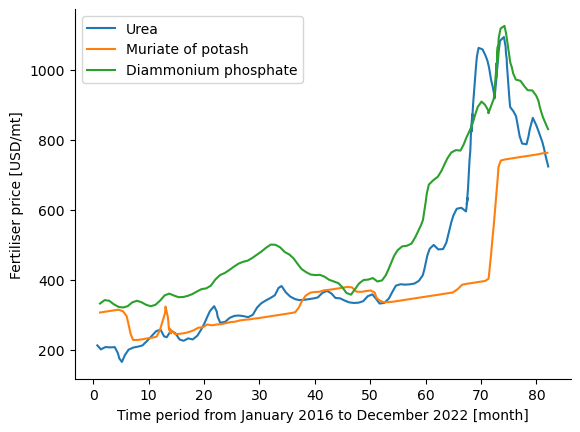

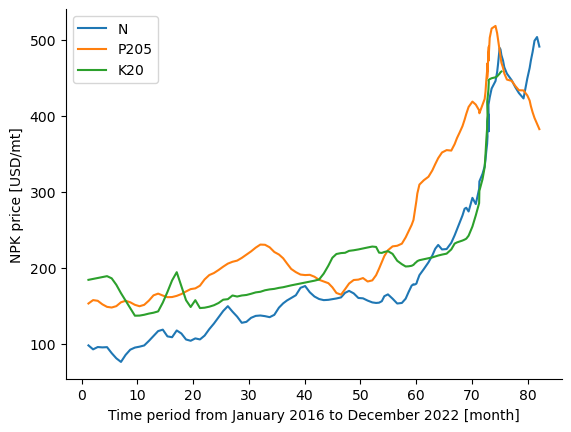

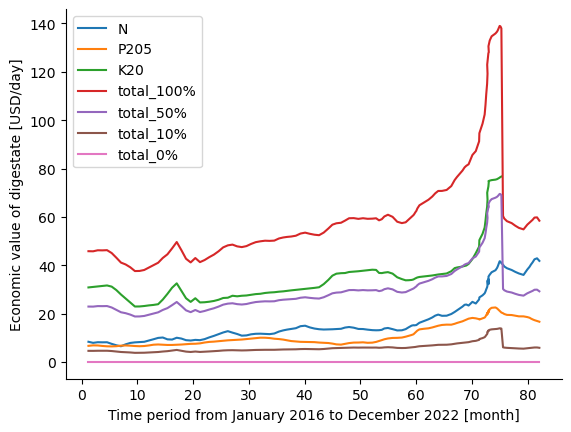

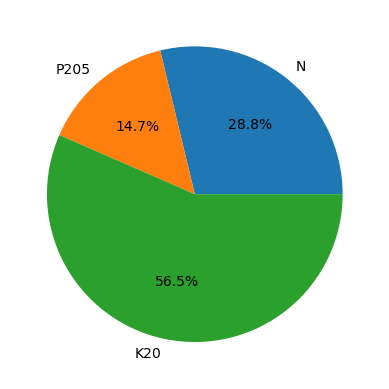

Number of rows, columns for natural_gas: (89, 2)
(89, 2)


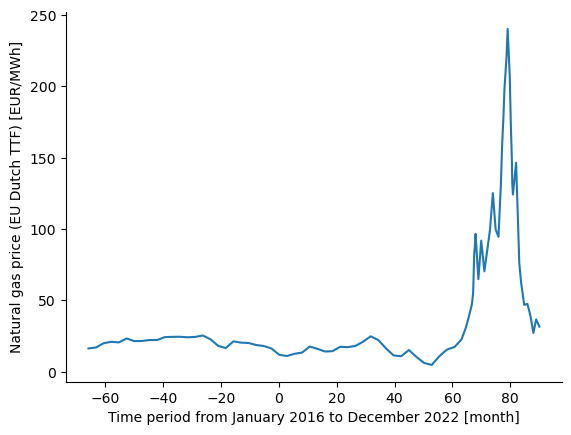

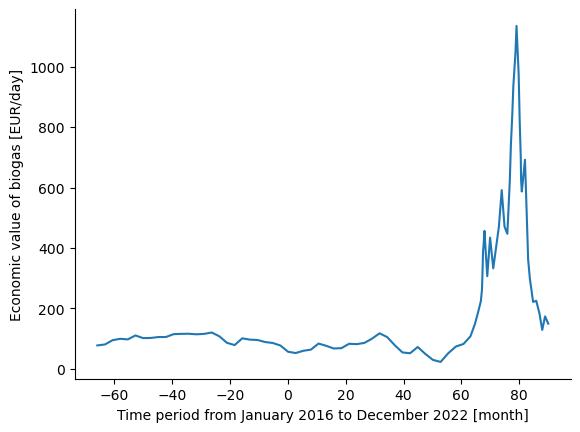

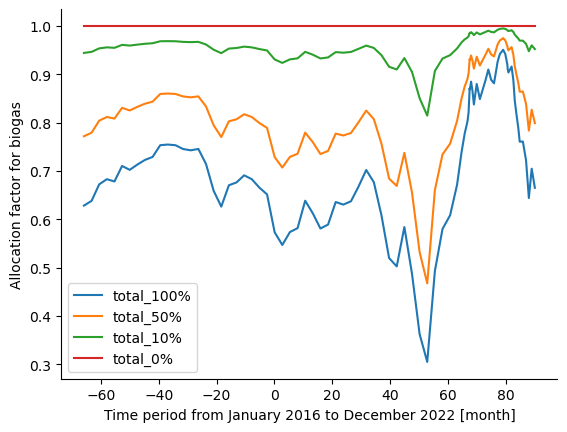

In [17]:
from alloc_biogas_digestate import AllocationBiogasDigestate

df_alloc_biogas = AllocationBiogasDigestate (allocation_type = 'economic', data_dict = data_dict3, ddir = ddir, resdir = resdir)

In [18]:
maxValues = df_alloc_biogas.max()
minValues = df_alloc_biogas.min()
averageValues = df_alloc_biogas.mean()
sdtValues = df_alloc_biogas.std()

print('Maximum values:\n%s' %maxValues)
print('\nMinimum values:\n%s' %minValues)
print('\nAverage values:\n%s' %averageValues)
print('\nStandard deviation values:\n%s' %sdtValues)

Maximum values:
alloc_biogas_total_100%    0.950652
alloc_biogas_total_50%     0.974702
alloc_biogas_total_10%     0.994836
alloc_biogas_total_0%      1.000000
dtype: float64

Minimum values:
alloc_biogas_total_100%    0.305217
alloc_biogas_total_50%     0.467688
alloc_biogas_total_10%     0.814574
alloc_biogas_total_0%      1.000000
dtype: float64

Average values:
alloc_biogas_total_100%    0.730270
alloc_biogas_total_50%     0.836411
alloc_biogas_total_10%     0.959750
alloc_biogas_total_0%      1.000000
dtype: float64

Standard deviation values:
alloc_biogas_total_100%    0.138699
alloc_biogas_total_50%     0.097876
alloc_biogas_total_10%     0.029731
alloc_biogas_total_0%      0.000000
dtype: float64


### 4.3. Creation of two distinct activities for biogas and digestate production

The activities **"S4A1BiogasAD"** and **"S4A1DigestateAD"** are based on the ecoinvent activity *"anaerobic digestion of manure (CH)"*. The dataset was copied twice. The amount of input manure (all forms) was set to 0 to "unlink" the activity to upstreams processes. The initial amount of AD plant and emissions were multiplied by the allocation factor for **"S4A1BiogasAD"** and by (1 - the allocation factor) for **"S4A1DigestateAD"**.

In [19]:
# the economic allocation factor for biogas is set to the average value for the 50% startegy
alloc_biogas =  0.836411

In [20]:
# the activity is scaled to the production of 1 m3 of biogas
S4A1BiogasAD = alg.copyActivity(db_S1234_tech2_name, biogas_AD_act, 'S4A1BiogasAD')
S4A1BiogasAD.updateExchanges({
    'anaerobic digestion plant*' : S4A1BiogasAD.getAmount('anaerobic digestion plant*') * alloc_biogas,
    'manure, liquid, swine*' : 0, # to make sure that no impacts are associated with the use of manure
    'manure, liquid, cattle*' : 0,
    'manure, solid, cattle*' : 0,
    'heat, central or small-scale, other than natural gas*' : 0, # the heat is reciruclated from CHP
    'electricity, low voltage*' : 0, # electricity is reciruclated from CHP
    'digester sludge*' : 0, # make sure that no impacts are attributed to its disposal
    'Dinitrogen monoxide*' : S4A1BiogasAD.getAmount('Dinitrogen monoxide*') * alloc_biogas,
    'Ammonia*': S4A1BiogasAD.getAmount('Ammonia*') * alloc_biogas,
    'Methane, non-fossil*' : S4A1BiogasAD.getAmount('Methane, non-fossil*') * alloc_biogas,
    'Carbon dioxide, non-fossil' : S4A1BiogasAD.getAmount('Carbon dioxide, non-fossil') * alloc_biogas
})

In [21]:
# impacts on climate change for the production of 1m3 of biogas
alg.exploreImpacts(GWP, S4A1BiogasAD)

S4A1BiogasAD[CH] (1.000000 cubic meter)   
                                                                                                input   
Ammonia                                                                                       Ammonia  \
Carbon dioxide, non-fossil                                                 Carbon dioxide, non-fossil   
Dinitrogen monoxide                                                               Dinitrogen monoxide   
Hydrogen sulfide                                                                     Hydrogen sulfide   
Methane, non-fossil                                                               Methane, non-fossil   
anaerobic digestion plant, agriculture, with me...  anaerobic digestion plant construction, agricu...   
digester sludge                                             digester sludge, Recycled Content cut-off   
electricity, low voltage                                      market for electricity, low voltage[CH]   
heat, central or small-scale, other than natura...  market for heat, central or small-scale, other...   
manure, liquid, cattle                                              market for manure, liquid, cattle   
manure, liquid, swine                                                market for manure, liquid, swine   
manure, solid, cattle                                                market for manure, solid, cattle   

                                                                        
                                                      amount    impact  
Ammonia                                             0.012229       0.0  
Carbon dioxide, non-fossil                          0.221448       0.0  
Dinitrogen monoxide                                 0.001602  0.477327  
Hydrogen sulfide                                    0.000041       0.0  
Methane, non-fossil                                 0.032968  0.735196  
anaerobic digestion plant, agriculture, with me...       0.0  0.019683  
digester sludge                                            0       0.0  
electricity, low voltage                                   0       0.0  
heat, central or small-scale, other than natura...         0       0.0  
manure, liquid, cattle                                     0       0.0  
manure, liquid, swine                                      0       0.0  
manure, solid, cattle                                      0       0.0

In [22]:
# the activity is scaled to the production of 1 m3 of biogas
S4A1DigestateAD = alg.copyActivity(db_S1234_tech2_name, biogas_AD_act, 'S4A1DigestateAD')
S4A1DigestateAD.updateExchanges({
    'anaerobic digestion plant*' : S4A1BiogasAD.getAmount('anaerobic digestion plant*') * (1-alloc_biogas),
    'manure, liquid, swine*' : 0, # to make sure that no impacts are associated with the use of manure
    'manure, liquid, cattle*' : 0,
    'manure, solid, cattle*' : 0,
    'heat, central or small-scale, other than natural gas*' : 0, # the heat is reciruclated from CHP
    'electricity, low voltage*' : 0, # electricity is reciruclated from CHP
    'digester sludge*' : 0, # make sure that no impacts are attributed to its disposal
    'Dinitrogen monoxide*' : S4A1BiogasAD.getAmount('Dinitrogen monoxide*') * (1-alloc_biogas),
    'Hydrogen sulfide*' : S4A1BiogasAD.getAmount('Hydrogen sulfide*') * (1-alloc_biogas),
    'Ammonia*': S4A1BiogasAD.getAmount('Ammonia*') * (1-alloc_biogas),
    'Methane, non-fossil*' : S4A1BiogasAD.getAmount('Methane, non-fossil*') * (1-alloc_biogas),
    'Carbon dioxide, non-fossil' : S4A1BiogasAD.getAmount('Carbon dioxide, non-fossil') * (1-alloc_biogas)
})

In [23]:
# impacts on climate change for the production digestate based on 1m3 of biogas
alg.exploreImpacts(GWP, S4A1DigestateAD)

S4A1DigestateAD[CH] (1.000000 cubic meter)   
                                                                                                input   
Ammonia                                                                                       Ammonia  \
Carbon dioxide, non-fossil                                                 Carbon dioxide, non-fossil   
Dinitrogen monoxide                                                               Dinitrogen monoxide   
Hydrogen sulfide                                                                     Hydrogen sulfide   
Methane, non-fossil                                                               Methane, non-fossil   
anaerobic digestion plant, agriculture, with me...  anaerobic digestion plant construction, agricu...   
digester sludge                                             digester sludge, Recycled Content cut-off   
electricity, low voltage                                      market for electricity, low voltage[CH]   
heat, central or small-scale, other than natura...  market for heat, central or small-scale, other...   
manure, liquid, cattle                                              market for manure, liquid, cattle   
manure, liquid, swine                                                market for manure, liquid, swine   
manure, solid, cattle                                                market for manure, solid, cattle   

                                                                        
                                                      amount    impact  
Ammonia                                             0.002001       0.0  
Carbon dioxide, non-fossil                          0.036227       0.0  
Dinitrogen monoxide                                 0.000262  0.078085  
Hydrogen sulfide                                    0.000007       0.0  
Methane, non-fossil                                 0.005393   0.12027  
anaerobic digestion plant, agriculture, with me...       0.0   0.00322  
digester sludge                                            0       0.0  
electricity, low voltage                                   0       0.0  
heat, central or small-scale, other than natura...         0       0.0  
manure, liquid, cattle                                     0       0.0  
manure, liquid, swine                                      0       0.0  
manure, solid, cattle                                      0       0.0

## 5. Addition of the CHP activity

The activities for heat and electricity production from CHP are copied from ecoinvent. The only exchange modified is the input biogas which was set to 0 to "unlink" the activity to upstream processes. The allocation procedure applied in ecoinvent was kept.

In [24]:
elec_CHP_act = alg.findActivity(name = 'heat and power co-generation, biogas, gas engine', loc = 'IT', unit = 'kilowatt hour', db_name = 'ecoinvent_3.6_cutoff')
S4A2ElecCHP = alg.copyActivity(db_S1234_tech2_name, elec_CHP_act, 'S4A2ElecCHP')
S4A2ElecCHP.updateExchanges({'biogas*' : 0})
#alg.printAct(S4A2ElecCHP)

In [25]:
alg.exploreImpacts(GWP, S4A2ElecCHP)

S4A2ElecCHP[IT] (1.000000 kilowatt hour)   
                                                                                                input   
Carbon dioxide, non-fossil                                                 Carbon dioxide, non-fossil  \
Carbon monoxide, non-fossil                                               Carbon monoxide, non-fossil   
Dinitrogen monoxide                                                               Dinitrogen monoxide   
Methane, non-fossil                                                               Methane, non-fossil   
NMVOC, non-methane volatile organic compounds, ...  NMVOC, non-methane volatile organic compounds,...   
Nitrogen oxides                                                                       Nitrogen oxides   
Platinum                                                                                     Platinum   
Sulfur dioxide                                                                         Sulfur dioxide   
biogas                                                                         market for biogas[RoW]   
heat and power co-generation unit, 160kW electr...  heat and power co-generation unit construction...   
heat and power co-generation unit, 160kW electr...  heat and power co-generation unit construction...   
heat and power co-generation unit, 160kW electr...  heat and power co-generation unit construction...   
lubricating oil                                                       market for lubricating oil[RER]   
waste mineral oil                                   market for waste mineral oil[Europe without Sw...   

                                                                        
                                                      amount    impact  
Carbon dioxide, non-fossil                          0.653579       0.0  
Carbon monoxide, non-fossil                         0.000376       0.0  
Dinitrogen monoxide                                  0.00002  0.005831  
Methane, non-fossil                                  0.00018  0.004015  
NMVOC, non-methane volatile organic compounds, ...  0.000016       0.0  
Nitrogen oxides                                     0.000117       0.0  
Platinum                                                 0.0       0.0  
Sulfur dioxide                                      0.000196       0.0  
biogas                                                     0       0.0  
heat and power co-generation unit, 160kW electr...       0.0  0.003459  
heat and power co-generation unit, 160kW electr...       0.0  0.000582  
heat and power co-generation unit, 160kW electr...       0.0  0.000776  
lubricating oil                                     0.000235  0.000283  
waste mineral oil                                  -0.000235  0.000442

In [26]:
heat_CHP_act = alg.findActivity(name = 'heat and power co-generation, biogas, gas engine', loc = 'IT', unit = 'megajoule', db_name = 'ecoinvent_3.6_cutoff')
S4A2HeatCHP = alg.copyActivity(db_S1234_tech2_name, heat_CHP_act, 'S4A2HeatCHP')
S4A2HeatCHP.updateExchanges({'biogas*' : 0})
#alg.printAct(S4A2HeatCHP)

In [27]:
alg.exploreImpacts(GWP, S4A2HeatCHP)

S4A2HeatCHP[IT] (1.000000 megajoule)   
                                                                                                input   
Carbon dioxide, non-fossil                                                 Carbon dioxide, non-fossil  \
Carbon monoxide, non-fossil                                               Carbon monoxide, non-fossil   
Dinitrogen monoxide                                                               Dinitrogen monoxide   
Methane, non-fossil                                                               Methane, non-fossil   
NMVOC, non-methane volatile organic compounds, ...  NMVOC, non-methane volatile organic compounds,...   
Nitrogen oxides                                                                       Nitrogen oxides   
Platinum                                                                                     Platinum   
Sulfur dioxide                                                                         Sulfur dioxide   
biogas                                                                         market for biogas[RoW]   
heat and power co-generation unit, 160kW electr...  heat and power co-generation unit construction...   
heat and power co-generation unit, 160kW electr...  heat and power co-generation unit construction...   
heat and power co-generation unit, 160kW electr...  heat and power co-generation unit construction...   
lubricating oil                                                       market for lubricating oil[RER]   
waste mineral oil                                   market for waste mineral oil[Europe without Sw...   

                                                                        
                                                      amount    impact  
Carbon dioxide, non-fossil                          0.030805       0.0  
Carbon monoxide, non-fossil                         0.000018       0.0  
Dinitrogen monoxide                                 0.000001  0.000275  
Methane, non-fossil                                 0.000008  0.000189  
NMVOC, non-methane volatile organic compounds, ...  0.000001       0.0  
Nitrogen oxides                                     0.000006       0.0  
Platinum                                                 0.0       0.0  
Sulfur dioxide                                      0.000009       0.0  
biogas                                                     0       0.0  
heat and power co-generation unit, 160kW electr...       0.0  0.000163  
heat and power co-generation unit, 160kW electr...       0.0  0.000027  
heat and power co-generation unit, 160kW electr...       0.0  0.000037  
lubricating oil                                     0.000011  0.000013  
waste mineral oil                                  -0.000011  0.000021

## 6. Addition of the solid-liquid separation and dewatering activities

Since the only product used is the liquid digestate, only one activity is created for LF. The impacts are allocated according to mass. Based on the study from [Tambone et al. (2017)](https://doi.org/10.1016/j.biortech.2017.07.130), 71% of the DM of the digestate is transferrred to the LF after separation. An allocation factor of 0.71 was used for LF and 0.29 for the solid fraction SF. The electricity required by the activity was covered by the electricity produced by CHP. 

In [28]:
S4A3SLseparation = alg.newActivity(db_S1234_tech2_name, 
                               name = 'S4A3SLseparation', 
                               unit = 'm3', 
                               exchanges = {})

The electricity required by the activity was covered by the electricity produced by CHP. The electricity required by the activity was covered by the electricity produced by CHP. 

In [29]:
S4A4Dewatering = alg.newActivity(db_S1234_tech2_name, 
                               'S4A4Dewatering', 
                               'm3', 
                               exchanges={})

## 7. Addition of the nitrogen recovery activity

The nitrogen recovery activity was modelled according to [Attene et al. (2023)](https://doi.org/10.3390/su15010675) and was performed using either **citric acid** or **sulfuric acid**. The process is multifunctional and produces nitrogen-depleted digestate and a solution of ammonium salts (i.e. ammonium citrate or ammonium sulfate).

Possible methods to handle multifunctionality: 
1) All the impacts are attributed to the ammonium salts because the N deprived solution has no economic value or application. The N-depeleted solution is treated as wastewater. 
2) The impacts are distributed between the ammonium salts and the N-deprived solution based on the N content of the two products (considering the same economic value for N for both products).
3) The impacts are distributed based on the economic value of each fraction.

Here, the first method was used and we considered the N-depleted fraction as a waste.

In [30]:
alloc_N = 1

In [31]:
citric_acid_act = [act for act in bw.Database('ecoinvent_3.6_cutoff') 
                   if 'citric acid production' in act['name']
                   and act['location'] == 'RER'
                   and act['reference product'] == 'citric acid'][0]

In [32]:
# the activity is scaled to the production of 1 kg of citric acid
# a transportation distance of 1,185 km was assumed to ship citric acid from Spain to Sardinia
S4A5CitricAcidProd = alg.newActivity(db_S1234_tech2_name,
                                     'S4A5CitricAcidProd',
                                     'kg',
                                     exchanges = {
                                         citric_acid_act: 1,
                                         alg.findTechAct('market for transport, freight, sea, ferry') : 1185*0.001})

In [33]:
sulfuric_acid_act = alg.findTechAct('sulfuric acid production', 'RER')
tap_water_act = alg.findTechAct('tap water production, underground water without treatment', 'Europe without Switzerland')

In [34]:
# activity scaled to the production of 1 kg of nitrogen from citric acid
alloc_N = 1
S4A5NitrogenRecCitr = alg.newActivity(db_S1234_tech2_name,
                                      'S4A5NitrogenRecCitr',
                                      'kg',
                                      exchanges = {S4A5CitricAcidProd: 5.99 * alloc_N,
                                                   tap_water_act : 220 * alloc_N})

In [35]:
# activity scaled to the production of 1 kg of nitrogen from sulfuric acid
S4A5NitrogenRecSulf = alg.newActivity(db_S1234_tech2_name,
                                      'S4A5NitrogenRecSulf',
                                      'kg',
                                      exchanges={sulfuric_acid_act: 2.84 * alloc_N,
                                                 tap_water_act : 220 * alloc_N})

## 8. Summary of the mass and energy balance of the AD-CHP-Nrec system

In [36]:
daily_grass_silage = data_dict3['grass_silage']['m_feed']
daily_slurry = data_dict3['cattle_slurry']['m_feed']
daily_biogas_prod = data_dict3['total']['BG_prod']
daily_elec_prod = data_dict3['total']['electricity']
daily_heat_prod = data_dict3['total']['heat']
daily_dig_prod = data_dict3['total']['m_dig']
ratio_dig_biogas = daily_dig_prod['amount'] / daily_biogas_prod['amount']
daily_N_prod = data_dict3['total']['N']
daily_P2O5_prod = data_dict3['total']['P2O5']
daily_K2O_prod = data_dict3['total']['K2O']

print('Amount of grass silage used daily: %s %s' %(round(daily_grass_silage['amount'],2), daily_grass_silage['unit']))
print('Amount of cattle slurry used daily: %s %s' %(round(daily_slurry['amount'],2), daily_slurry['unit']))
print('Amount of biogas produced daily (1 digester): %s %s' %(round(daily_biogas_prod['amount'],2), daily_biogas_prod['unit']))
print('Amount of electricity produced daily: %s %s' %(round(daily_elec_prod['amount'],2), daily_elec_prod['unit']))
print('Amount of heat produced daily: %s %s' %(round(daily_heat_prod['amount'],2), daily_heat_prod['unit']))
print('Amount of digestate produced daily: %s %s' %(round(daily_dig_prod['amount'],2), daily_dig_prod['unit']))
print('Daily ratio of volume of digestate/biogas: %s m3 dig./m3 biogas' %(round(ratio_dig_biogas,2)))

Amount of grass silage used daily: 3.62 t/day
Amount of cattle slurry used daily: 16.84 t/day
Amount of biogas produced daily (1 digester): 726.13 m3/day
Amount of electricity produced daily: 1747.31 kWh/day
Amount of heat produced daily: 2502.91 kWh/day
Amount of digestate produced daily: 18.45 m3/day
Daily ratio of volume of digestate/biogas: 0.03 m3 dig./m3 biogas


## 9. Construction of the models for electricity, heat, and nitrogen production

### 9.1. Electricity production from AD-CHP versus conventional electricity production

#### 9.1.1. Allocation of the impacts between biogas/digestate and electricity/heat

Model activity for the production of **1 kWh of electricity from biogas**, applying the partitioning approach to allocation the environmental impacts between 1) biogas & digestate and 2) electricity & heat. 

In [37]:
# model activity for the production of 1 kWh of electricity from CHP using allocation
model_elec_CHP_alloc = alg.newActivity('db_S1234_tech2', 
                           'model_elec_CHP_alloc', 
                           'kWh', 
                           {S4A0GrassSillageProd : daily_grass_silage['amount'] / daily_elec_prod['amount'],
                            #S4A0CattleSlurryStorage : daily_slurry['amount'] / daily_elec_prod['amount'],
                            S4A0CattleSlurryStorage : 0,
                            S4A1BiogasAD : daily_biogas_prod['amount'] / daily_elec_prod['amount'],
                            S4A2ElecCHP : 1})

In [39]:
alg.exploreImpacts(GWP, model_elec_CHP_alloc)

model_elec_CHP_alloc (1.000000 kWh)             
                                                      input    amount   
S4A0CattleSlurryStorage    S4A0CattleSlurryStorage{user-db}         0  \
S4A0GrassSillageProd          S4A0GrassSillageProd{user-db}  0.002072   
S4A1BiogasAD                      S4A1BiogasAD[CH]{user-db}  0.415571   
S4A2ElecCHP                        S4A2ElecCHP[IT]{user-db}         1   

                                   
                           impact  
S4A0CattleSlurryStorage       0.0  
S4A0GrassSillageProd      0.27832  
S4A1BiogasAD              0.51207  
S4A2ElecCHP              0.015388

#### 9.1.2. Substitution of mineral fertiliser and conventional heat

Model activity for the production of **1 kWh of electricity from biogas**, applying the substitution approach to the digestate (alternative source of NPK) and the heat from CHP. 

In [40]:
# conventional activities substituted by the digestate and heat produced
conv_heat_prod = [act for act in bw.Database('ecoinvent_3.6_cutoff') if 
                 'heat and power co-generation, natural gas, conventional power plant, 100MW electrical' in act['name']
                 and act['location'] == 'IT'
                 and 'heat' in act['reference product']
                 ][0]

conv_mineral_fert_P = [act for act in bw.Database('ecoinvent_3.6_cutoff') if 
                 'diammonium phosphate production' in act['name']
                 and act['location'] == 'RER'
                 and 'phosphate' in act['reference product']
                 ][0]

conv_mineral_fert_N = alg.findTechAct('market for urea, as N', 'GLO')

conv_mineral_fert_K = alg.findTechAct('market for potassium chloride, as K2O', 'GLO')

In [41]:
model_elec_CHP_subst = alg.newActivity('db_S1234_tech2',
                                       'model_elec_CHP_subst',
                                       'kWh', 
                                       {S4A0GrassSillageProd : daily_grass_silage['amount'] / daily_elec_prod['amount'],
                                        #S4A0CattleSlurryStorage : daily_slurry['amount'] / daily_elec_prod['amount'],
                                        S4A0CattleSlurryStorage : 0,
                                        S4A1BiogasAD : daily_biogas_prod['amount'] / daily_elec_prod['amount'],
                                        S4A2ElecCHP : 1,
                                        # conventional activities substituted
                                        conv_heat_prod : - (daily_heat_prod['amount'] / daily_elec_prod['amount']),
                                        conv_mineral_fert_N : - (daily_N_prod['amount'] / daily_elec_prod['amount']),
                                        conv_mineral_fert_P : - (daily_P2O5_prod['amount'] / daily_elec_prod['amount']),
                                        conv_mineral_fert_K : - (daily_K2O_prod['amount'] / daily_elec_prod['amount'])
                                       })

In [42]:
#alg.exploreImpacts(GWP, model_elec_CHP_subst, alloc_biogas = 1) # no partioning because substitution
alg.exploreImpacts(GWP, model_elec_CHP_subst)

model_elec_CHP_subst (1.000000 kWh)   
                                                                                                input   
S4A0CattleSlurryStorage                                              S4A0CattleSlurryStorage{user-db}  \
S4A0GrassSillageProd                                                    S4A0GrassSillageProd{user-db}   
S4A1BiogasAD                                                                S4A1BiogasAD[CH]{user-db}   
S4A2ElecCHP                                                                  S4A2ElecCHP[IT]{user-db}   
diammonium phosphate production                                  diammonium phosphate production[RER]   
heat and power co-generation, natural gas, conv...  heat and power co-generation, natural gas, con...   
market for potassium chloride, as K2O                           market for potassium chloride, as K2O   
market for urea, as N                                                           market for urea, as N   

                                                                        
                                                      amount    impact  
S4A0CattleSlurryStorage                                    0       0.0  
S4A0GrassSillageProd                                0.002072   0.27832  
S4A1BiogasAD                                        0.415571   0.51207  
S4A2ElecCHP                                                1  0.015388  
diammonium phosphate production                    -0.024901 -0.032783  
heat and power co-generation, natural gas, conv... -1.432432 -0.049562  
market for potassium chloride, as K2O              -0.095838 -0.042607  
market for urea, as N                              -0.048743 -0.157174

#### 9.1.3. Comparison with conventional electricity production (grid, PV)

In [43]:
# comparison of the impacts for the production of 1 kWh of electricity
conv_elec_gridIT_act = alg.findTechAct('market for electricity, medium voltage', 'IT')
conv_elec_PVIT_act = alg.findTechAct('electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted', 'IT')
df = alg.multiLCAAlgebric([model_elec_CHP_alloc,model_elec_CHP_subst,conv_elec_gridIT_act, conv_elec_PVIT_act], [GWP])

In [44]:
df

,climate change - GWP100[kg CO2-Eq]
model_elec_CHP_alloc,0.805777
model_elec_CHP_subst,0.523651
"market for electricity, medium voltage[IT]",0.431125
"electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted[IT]",0.068870


Text(0.5, 0, 'Impact on climate change [kg CO2-eq / kWh]')

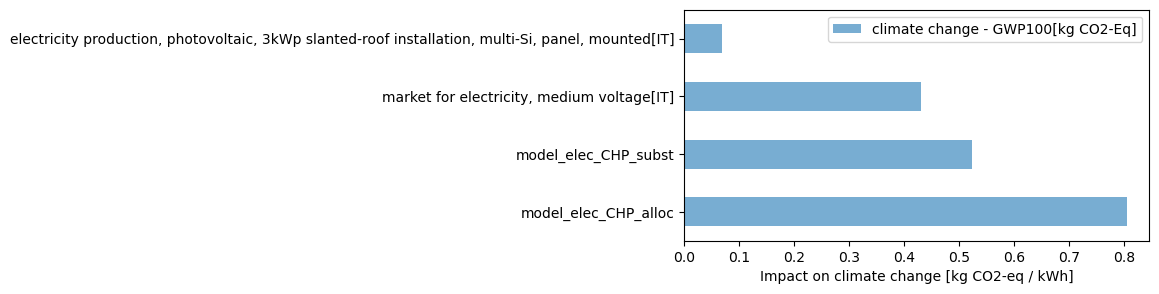

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (6, 3))
df.plot(ax = ax, kind = 'barh', alpha = 0.6)
plt.xlabel('Impact on climate change [kg CO2-eq / kWh]')

### 9.2. Heat production from AD-CHP versus conventional heat production

#### 9.2.1. Allocation of the impacts between biogas/digestate and electricity/heat

In [46]:
# model activity for the production of 1 MJ of heat from CHP using allocation (conversion 1 kWh = 3.6 MJ)
model_heat_CHP_alloc = alg.newActivity('db_S1234_tech2', 
                           'model_heat_CHP_alloc', 
                           'MJ', 
                           {S4A0GrassSillageProd : daily_grass_silage['amount'] / daily_heat_prod['amount'] / 3.6,
                            #S4A0CattleSlurryStorage : daily_slurry['amount'] / daily_heat_prod['amount'] / 3.6,
                            S4A0CattleSlurryStorage : 0,
                            S4A1BiogasAD : daily_biogas_prod['amount'] / daily_heat_prod['amount'] / 3.6,
                            S4A2HeatCHP : 1})

In [47]:
alg.exploreImpacts(GWP, model_heat_CHP_alloc)

model_heat_CHP_alloc (1.000000 MJ)                    
                                                     input    amount    impact
S4A0CattleSlurryStorage   S4A0CattleSlurryStorage{user-db}         0       0.0
S4A0GrassSillageProd         S4A0GrassSillageProd{user-db}  0.000402  0.053972
S4A1BiogasAD                     S4A1BiogasAD[CH]{user-db}  0.080588  0.099301
S4A2HeatCHP                       S4A2HeatCHP[IT]{user-db}         1  0.000725

#### 9.2.2. Substitution of mineral fertiliser and conventional electricity

In [48]:
# conventional activities substituted by the digestate and heat produced
conv_elec_prod = alg.findTechAct('market for electricity, medium voltage', 'IT')

In [49]:
model_heat_CHP_subst = alg.newActivity('db_S1234_tech2',
                                       'model_heat_CHP_subst',
                                       'kWh', 
                                       {S4A0GrassSillageProd : daily_grass_silage['amount'] / daily_heat_prod['amount'] / 3.6,
                                        #S4A0CattleSlurryStorage : daily_slurry['amount'] / daily_heat_prod['amount'] / 3.6,
                                        S4A0CattleSlurryStorage : 0,
                                        S4A1BiogasAD : daily_biogas_prod['amount'] / daily_heat_prod['amount'] / 3.6,
                                        S4A2HeatCHP : 1, # conversion 1 kWh = 3.6 MJ
                                        # conventional activities substituted
                                        conv_elec_prod : - (daily_elec_prod['amount'] / daily_heat_prod['amount'] / 3.6),
                                        conv_mineral_fert_N : - (daily_N_prod['amount'] / daily_heat_prod['amount'] / 3.6),
                                        conv_mineral_fert_P : - (daily_P2O5_prod['amount'] / daily_heat_prod['amount'] / 3.6),
                                        conv_mineral_fert_K : - (daily_K2O_prod['amount'] / daily_heat_prod['amount'] / 3.6)
                                       })

In [50]:
#alg.exploreImpacts(GWP, model_heat_CHP_subst, alloc_biogas = 1)
alg.exploreImpacts(GWP, model_heat_CHP_subst)

model_heat_CHP_subst (1.000000 kWh)   
                                                                             input   
S4A0CattleSlurryStorage                           S4A0CattleSlurryStorage{user-db}  \
S4A0GrassSillageProd                                 S4A0GrassSillageProd{user-db}   
S4A1BiogasAD                                             S4A1BiogasAD[CH]{user-db}   
S4A2HeatCHP                                               S4A2HeatCHP[IT]{user-db}   
diammonium phosphate production               diammonium phosphate production[RER]   
market for electricity, medium voltage  market for electricity, medium voltage[IT]   
market for potassium chloride, as K2O        market for potassium chloride, as K2O   
market for urea, as N                                        market for urea, as N   

                                                            
                                          amount    impact  
S4A0CattleSlurryStorage                        0       0.0  
S4A0GrassSillageProd                    0.000402  0.053972  
S4A1BiogasAD                            0.080588  0.099301  
S4A2HeatCHP                                    1  0.000725  
diammonium phosphate production        -0.004829 -0.006357  
market for electricity, medium voltage  -0.19392 -0.083604  
market for potassium chloride, as K2O  -0.018585 -0.008262  
market for urea, as N                  -0.009452 -0.030479

#### 9.2.3. Comparison with conventional heat production (natural gas)

In [51]:
# comparison of the impacts for the production of 1 kWh of electricity
conv_heat_prod_act = alg.findTechAct('heat production, natural gas, at industrial furnace >100kW', 'Europe without Switzerland')
df_heat = alg.multiLCAAlgebric([conv_heat_prod_act, model_heat_CHP_alloc,model_heat_CHP_subst], [GWP])

In [52]:
df_heat

,climate change - GWP100[kg CO2-Eq]
"heat production, natural gas, at industrial furnace >100kW[Europe without Switzerland]",0.068892
model_heat_CHP_alloc,0.153998
model_heat_CHP_subst,0.025295


Text(0.5, 0, 'Impact on climate change [kg CO2-eq / MJ]')

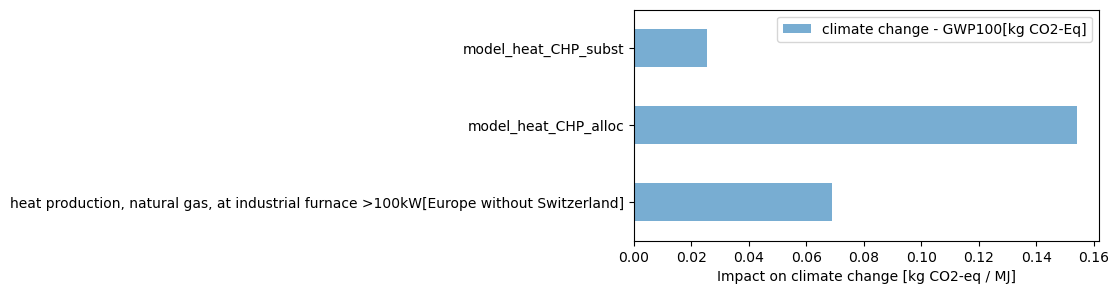

In [53]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (6, 3))
df_heat.plot(ax = ax, kind = 'barh', alpha = 0.6)
plt.xlabel('Impact on climate change [kg CO2-eq / MJ]')

### 9.3. Nitrogen production from AD-CHP-Nrec versus nitrogen from potassium nitrate

#### 9.3.1. Mass balance of Nrec and calculation of the N requirements

The volume of digestate that needs to be produced and processed in order to meet the N daily requirements for Spirulina growth is calculated from the recovery rates and losses occuring at the different process steps. A "reversed" mass balance is used.

##### Amount of N required for Spirulina growth

The daily amount of dry Spirulina biomass produced is fixed at 30.3 kg/day i.e. 28.78 kg DW-eq/day.

In [54]:
N_content = 0.10 # N content of Spirulina - estimated at 10% of dry biomass [%]
N_abs_eff = 0.8 # absorption efficiency of N in the culture medium - estimated at 80% [%]
N_prod = 28.78 # amount of dry Spirulina biomass produced daily [kg DW-eq]
N_req = N_prod * N_content / N_abs_eff # needs to provide more N to compensate for the fraction not absorbed [kg N]
print('Amount of N required to produce 28.78 kg DW-eq of dry Spirulina biomass: %s kg N/day' % N_req)

Amount of N required to produce 28.78 kg DW-eq of dry Spirulina biomass: 3.5975 kg N/day


##### Amount of N required considering the recovery efficiencies of the Nrec and SL separation process

In [55]:
N_to_amm = 0.71 # the recovery rate of N after Nrec is 71% [%]
N_req_after_Nrec = N_req / N_to_amm
print('Amount of N required after considering the N recovery rate of the Nrec process: %s kg N/day' % round(N_req_after_Nrec,4))

Amount of N required after considering the N recovery rate of the Nrec process: 5.0669 kg N/day


In [56]:
N_to_LF = 0.71 # the recovery rate of N after Nrec is 71% [%]
N_req_after_Nrec_LFsep = N_req_after_Nrec / N_to_LF
print('Amount of N required after considering the N recovery rates of the Nrec & LF separation processes: %s kg N/day' %round(N_req_after_Nrec_LFsep, 4))

Amount of N required after considering the N recovery rates of the Nrec & LF separation processes: 7.1365 kg N/day


##### Amount of digestate required to meet the daily N requirement

In [57]:
amount_N_digestate = data_dict3['total']['N']['amount'] # amount of N produced from the ADNrec model [kg N]
volume_digestate = data_dict3['total']['m_dig']['amount'] # volume of digestate produced from the AD model [m3]
amount_N_per_m3_digestate = amount_N_digestate / volume_digestate # amount of N per m3 of digestate [kg N/m3 digestate]
print('Amount of N produced per m3 of digestate: %s kg N/m3 digestate' %round(amount_N_per_m3_digestate,4))

Amount of N produced per m3 of digestate: 4.6164 kg N/m3 digestate


In [58]:
amount_N_per_m3_digestate_LF = 0.8781 * amount_N_per_m3_digestate
print('Amount of N produced per m3 of digestate LF: %s kg ' %round(amount_N_per_m3_digestate_LF,4))

Amount of N produced per m3 of digestate LF: 4.0536 kg 


In [59]:
# calculate the amount of digestate required to meet the daily N requirements
amount_digestate_req = N_req_after_Nrec_LFsep / amount_N_per_m3_digestate_LF
print('Volume of digestate needed to meet the daily N requirements: %s m3 digestate/day' %round(amount_digestate_req,4))

Volume of digestate needed to meet the daily N requirements: 1.7605 m3 digestate/day


#### 9.3.2. Scaling of the AD process for digestate production

The AD process was modelled using two distinctive activities i.e. **"S4A1DigestateAD"** and **"S4A1BiogasAD"**. The dataset for digestate production is a copy of the dataset for biogas production, except that the allocation factor used corresponds to **1 - allocation_biogas**. The two datasets are scaled to the production of 1 m3 of biogas. The dataset for digestate production is scaled to 1 m3 of biogas <=> 0.0217 m3 of digestate.

In [60]:
print('Amount of biogas produced daily: %s m3 biogas' %round(daily_biogas_prod['amount'],4))
print('Amount of digestate produced daily: %s m3 digestate' %round(daily_dig_prod['amount'],4))
print('Ratio between biogas/digestate production: %s m3 biogas/m3 digestate' %(round(daily_biogas_prod['amount']/daily_dig_prod['amount'],4)))

print('\nAmount of N in the digestate: %s kg N/m3 digestate' %round(amount_N_per_m3_digestate,4))
print('Amount of digestate required to produce 1 kg of N: %s m3 digestate/kg N' %round(1/amount_N_per_m3_digestate_LF,4))
print('Amount of biogas equivalent to the production of 1 kg N: %s m3 biogas/kg N' %round(1/amount_N_per_m3_digestate_LF*daily_biogas_prod['amount']/daily_dig_prod['amount'],4))

Amount of biogas produced daily: 726.1339 m3 biogas
Amount of digestate produced daily: 18.4495 m3 digestate
Ratio between biogas/digestate production: 39.3579 m3 biogas/m3 digestate

Amount of N in the digestate: 4.6164 kg N/m3 digestate
Amount of digestate required to produce 1 kg of N: 0.2467 m3 digestate/kg N
Amount of biogas equivalent to the production of 1 kg N: 9.7093 m3 biogas/kg N


In [61]:
print('Amount of grass silage needed to produce 1 kg N: %s tonne/kg N' %(round(daily_grass_silage['amount']/daily_N_prod['amount'],4)))
print('Amount of cattle slurry needed to produce 1 kg of N: %s tonne/kg N' %(round(daily_slurry['amount']/daily_N_prod['amount'],4)))

Amount of grass silage needed to produce 1 kg N: 0.0425 tonne/kg N
Amount of cattle slurry needed to produce 1 kg of N: 0.1977 tonne/kg N


In [62]:
print('Amount of N to be supplied to Spirulina daily: %s kg N/day' %round(amount_digestate_req,4))

Amount of N to be supplied to Spirulina daily: 1.7605 kg N/day


#### 9.3.3. Allocation of the impacts between biogas/digestate and SF/LF

In [63]:
# model activity for the production of 1 kg of N from AD-Nrec using allocation
model_Ncitr_alloc = alg.newActivity('db_S1234_tech2', 
                           'model_Ncitr_alloc', 
                           'kg', 
                            {S4A0GrassSillageProd : daily_grass_silage['amount']/daily_N_prod['amount'],
                             #S4A0CattleSlurryStorage : daily_slurry['amount']/daily_N_prod['amount'],
                             S4A1DigestateAD : 1/amount_N_per_m3_digestate_LF*daily_biogas_prod['amount']/daily_dig_prod['amount'],
                             S4A5NitrogenRecCitr : 1
                            })

In [64]:
1/amount_N_per_m3_digestate_LF*daily_biogas_prod['amount']/daily_dig_prod['amount']

9.709259102910783

In [65]:
alg.exploreImpacts(GWP, model_Ncitr_alloc)

model_Ncitr_alloc (1.000000 kg)                     
                                               input    amount     impact
S4A0GrassSillageProd   S4A0GrassSillageProd{user-db}  0.042503   5.709896
S4A1DigestateAD         S4A1DigestateAD[CH]{user-db}  9.709259   1.957149
S4A5NitrogenRecCitr     S4A5NitrogenRecCitr{user-db}         1  17.623636

In [66]:
# model activity for the production of 1 kg of N from AD-Nrec using allocation
model_Nsulf_alloc = alg.newActivity('db_S1234_tech2', 
                           'model_Nsulf_alloc', 
                           'kg', 
                            {S4A0GrassSillageProd : daily_grass_silage['amount']/daily_N_prod['amount'],
                             #S4A0CattleSlurryStorage : daily_slurry['amount']/daily_N_prod['amount'],
                             S4A1DigestateAD : 1/amount_N_per_m3_digestate_LF*daily_biogas_prod['amount']/daily_dig_prod['amount'],
                             S4A5NitrogenRecSulf : 1
                            })

In [67]:
alg.exploreImpacts(GWP, model_Nsulf_alloc)

model_Nsulf_alloc (1.000000 kg)                    
                                               input    amount    impact
S4A0GrassSillageProd   S4A0GrassSillageProd{user-db}  0.042503  5.709896
S4A1DigestateAD         S4A1DigestateAD[CH]{user-db}  9.709259  1.957149
S4A5NitrogenRecSulf     S4A5NitrogenRecSulf{user-db}         1  0.267615

#### 9.3.4. Substitution of conventional electricity, heat, and SF of digestate

In [68]:
model_Ncitr_subst = alg.newActivity('db_S1234_tech2',
                                    'model_Ncitr_subst',
                                    'kg', 
                                    {S4A0GrassSillageProd : daily_grass_silage['amount']/daily_N_prod['amount'],
                                     #S4A0CattleSlurryStorage : daily_slurry['amount']/daily_N_prod['amount'],
                                     S4A1DigestateAD : 1/amount_N_per_m3_digestate_LF*daily_biogas_prod['amount']/daily_dig_prod['amount'],
                                     S4A5NitrogenRecCitr : 1,
                                     # conventional activities substituted
                                     conv_elec_prod : - (daily_elec_prod['amount'] / daily_N_prod['amount']),
                                     conv_heat_prod : - (daily_heat_prod['amount'] / daily_N_prod['amount']),
                                     conv_mineral_fert_N : - (0.1219 * daily_N_prod['amount'] / daily_N_prod['amount']),
                                     conv_mineral_fert_P : - (0.2850 * daily_P2O5_prod['amount'] / daily_N_prod['amount']),
                                     #conv_mineral_fert_K : - (daily_K2O_prod['amount'] / daily_N_prod['amount'])
                                     })

In [69]:
#alg.exploreImpacts(GWP, model_Ncitr_subst, alloc_biogas = 1)
alg.exploreImpacts(GWP, model_Ncitr_subst)

model_Ncitr_subst (1.000000 kg)   
                                                                                                input   
S4A0GrassSillageProd                                                    S4A0GrassSillageProd{user-db}  \
S4A1DigestateAD                                                          S4A1DigestateAD[CH]{user-db}   
S4A5NitrogenRecCitr                                                      S4A5NitrogenRecCitr{user-db}   
diammonium phosphate production                                  diammonium phosphate production[RER]   
heat and power co-generation, natural gas, conv...  heat and power co-generation, natural gas, con...   
market for electricity, medium voltage                     market for electricity, medium voltage[IT]   
market for urea, as N                                                           market for urea, as N   

                                                                          
                                                       amount     impact  
S4A0GrassSillageProd                                 0.042503   5.709896  
S4A1DigestateAD                                      9.709259   1.957149  
S4A5NitrogenRecCitr                                         1  17.623636  
diammonium phosphate production                     -0.145595  -0.191683  
heat and power co-generation, natural gas, conv... -29.387227  -1.016797  
market for electricity, medium voltage             -20.515611  -8.844784  
market for urea, as N                                 -0.1219  -0.393069

In [70]:
model_Nsulf_subst = alg.newActivity('db_S1234_tech2',
                                    'model_Nsulf_subst',
                                    'kg', 
                                    {S4A0GrassSillageProd : daily_grass_silage['amount']/daily_N_prod['amount'],
                                     #S4A0CattleSlurryStorage : daily_slurry['amount']/daily_N_prod['amount'],
                                     S4A1DigestateAD : 1/amount_N_per_m3_digestate_LF*daily_biogas_prod['amount']/daily_dig_prod['amount'],
                                     S4A5NitrogenRecSulf : 1,
                                     # conventional activities substituted
                                     conv_elec_prod : - (daily_elec_prod['amount'] / daily_N_prod['amount']),
                                     conv_heat_prod : - (daily_heat_prod['amount'] / daily_N_prod['amount']),
                                     conv_mineral_fert_N : - (0.1219 * daily_N_prod['amount'] / daily_N_prod['amount']),
                                     conv_mineral_fert_P : - (0.2850 * daily_P2O5_prod['amount'] / daily_N_prod['amount']),
                                     #conv_mineral_fert_K : - (daily_K2O_prod['amount'] / daily_N_prod['amount'])
                                     })

In [71]:
#alg.exploreImpacts(GWP, model_Nsulf_subst, alloc_biogas = 1)
alg.exploreImpacts(GWP, model_Nsulf_subst)

model_Nsulf_subst (1.000000 kg)   
                                                                                                input   
S4A0GrassSillageProd                                                    S4A0GrassSillageProd{user-db}  \
S4A1DigestateAD                                                          S4A1DigestateAD[CH]{user-db}   
S4A5NitrogenRecSulf                                                      S4A5NitrogenRecSulf{user-db}   
diammonium phosphate production                                  diammonium phosphate production[RER]   
heat and power co-generation, natural gas, conv...  heat and power co-generation, natural gas, con...   
market for electricity, medium voltage                     market for electricity, medium voltage[IT]   
market for urea, as N                                                           market for urea, as N   

                                                                         
                                                       amount    impact  
S4A0GrassSillageProd                                 0.042503  5.709896  
S4A1DigestateAD                                      9.709259  1.957149  
S4A5NitrogenRecSulf                                         1  0.267615  
diammonium phosphate production                     -0.145595 -0.191683  
heat and power co-generation, natural gas, conv... -29.387227 -1.016797  
market for electricity, medium voltage             -20.515611 -8.844784  
market for urea, as N                                 -0.1219 -0.393069

#### 9.3.5. Comparison with conventional nitrogen production

In [72]:
conv_N_KNO3_prod_act = [act for act in bw.Database('ecoinvent_3.6_cutoff') 
                        if 'nutrient supply from potassium nitrate' in act['name'] 
                        and act['location'] == 'GLO' 
                        and act['reference product'] == 'nitrogen fertiliser, as N'][0]

In [73]:
df_Ncitr = alg.multiLCAAlgebric([conv_N_KNO3_prod_act, model_Ncitr_alloc, model_Ncitr_subst, model_Nsulf_alloc, model_Nsulf_subst], [GWP])

In [74]:
df_Ncitr

,climate change - GWP100[kg CO2-Eq]
nutrient supply from potassium nitrate,7.948848
model_Ncitr_alloc,25.290680
model_Ncitr_subst,14.844347
model_Nsulf_alloc,7.934659
model_Nsulf_subst,-2.511674


Text(0.5, 0, 'Impact on climate change [kg CO2-eq / kg N]')

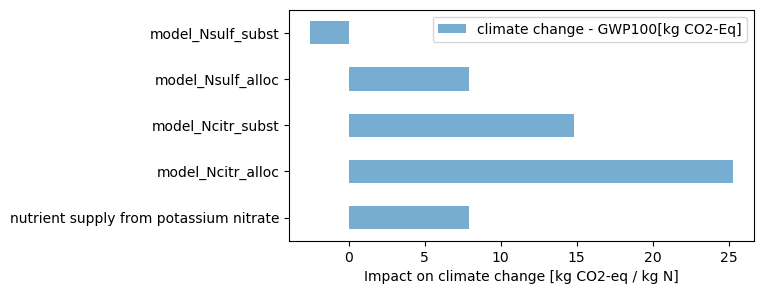

In [75]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (6, 3))
df_Ncitr.plot(ax = ax, kind = 'barh', alpha = 0.6)
plt.xlabel('Impact on climate change [kg CO2-eq / kg N]')